In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading CSV file into training set
training_set = pd.read_csv('TSE(original).csv')
training_set.head()

,Time,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Volume,MA5,MA10,DIF12-26,MACD9,OSC,"K(9,3)","D(9,3)"
0,2012/8/27,7504.45,7523.54,7457.75,7468.22,7490.86,7479.13,7395.94,7241.56,659.18,710.53,729.91,76.32,72.38,3.94,57.32%,68.45%
1,2012/8/28,7440.56,7445.08,7359.83,7361.94,7461.89,7467.40,7406.10,7249.34,736.45,700.44,722.05,65.42,70.99,-5.57,38.61%,58.50%
2,2012/8/29,7379.48,7405.30,7368.40,7391.15,7440.80,7459.74,7412.13,7255.86,641.73,702.66,711.24,56.67,68.12,-11.45,31.66%,49.55%
3,2012/8/30,7372.06,7404.94,7360.10,7371.44,7414.06,7447.87,7417.30,7261.11,744.06,713.92,706.17,48.21,64.14,-15.93,23.30%,40.80%
4,2012/8/31,7363.25,7406.52,7363.25,7397.06,7397.96,7440.78,7426.28,7266.39,626.43,681.57,690.22,42.15,59.74,-17.59,22.56%,34.72%


In [2]:
# Reading CSV file into test set
test_set = pd.read_csv('TSE(original).csv')
test_set.head()

,Time,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Volume,MA5,MA10,DIF12-26,MACD9,OSC,"K(9,3)","D(9,3)"
0,2012/8/27,7504.45,7523.54,7457.75,7468.22,7490.86,7479.13,7395.94,7241.56,659.18,710.53,729.91,76.32,72.38,3.94,57.32%,68.45%
1,2012/8/28,7440.56,7445.08,7359.83,7361.94,7461.89,7467.40,7406.10,7249.34,736.45,700.44,722.05,65.42,70.99,-5.57,38.61%,58.50%
2,2012/8/29,7379.48,7405.30,7368.40,7391.15,7440.80,7459.74,7412.13,7255.86,641.73,702.66,711.24,56.67,68.12,-11.45,31.66%,49.55%
3,2012/8/30,7372.06,7404.94,7360.10,7371.44,7414.06,7447.87,7417.30,7261.11,744.06,713.92,706.17,48.21,64.14,-15.93,23.30%,40.80%
4,2012/8/31,7363.25,7406.52,7363.25,7397.06,7397.96,7440.78,7426.28,7266.39,626.43,681.57,690.22,42.15,59.74,-17.59,22.56%,34.72%


In [3]:
# Getting relevant feature
training_set = training_set.iloc[:,1:2]
training_set.head()

,Open
0,7504.45
1,7440.56
2,7379.48
3,7372.06
4,7363.25


In [4]:
# Converting to 2D array
training_set = training_set.values
training_set

array([[  7504.45],
       [  7440.56],
       [  7379.48],
       ..., 
       [ 11189.57],
       [ 11054.36],
       [ 11139.4 ]])

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[ 0.09393727],
       [ 0.07845513],
       [ 0.06365392],
       ..., 
       [ 0.98693384],
       [ 0.95416908],
       [ 0.97477639]])

In [6]:
# Getting the inputs and the ouputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

# Example
today = pd.DataFrame(X_train[0:5])
tomorrow = pd.DataFrame(y_train[0:5])
ex = pd.concat([today, tomorrow], axis=1)
ex.columns = (['today', 'tomorrow'])
ex

,today,tomorrow
0,0.093937,0.078455
1,0.078455,0.063654
2,0.063654,0.061856
3,0.061856,0.059721
4,0.059721,0.075993


In [7]:
# Reshaping into required shape for Keras
X_train = np.reshape(X_train, (1257, 1, 1))
X_train

array([[[ 0.09393727]],

       [[ 0.07845513]],

       [[ 0.06365392]],

       ..., 
       [[ 0.7761402 ]],

       [[ 0.78652625]],

       [[ 0.80168367]]])

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [9]:
# Initializing the Recurrent Neural Network
regressor = Sequential()

In [10]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [11]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [12]:
# Compiling the Recurrent Neural Network
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
# Fitting the Recurrent Neural Network to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 1ms/step - loss: 0.0471
Epoch 2/200
1257/1257 [==============================] - 0s 49us/step - loss: 0.0352
Epoch 3/200
1257/1257 [==============================] - 0s 13us/step - loss: 0.0330
Epoch 4/200
1257/1257 [==============================] - 0s 37us/step - loss: 0.0323
Epoch 5/200
1257/1257 [==============================] - 0s 38us/step - loss: 0.0317
Epoch 6/200
1257/1257 [==============================] - 0s 40us/step - loss: 0.0311
Epoch 7/200
1257/1257 [==============================] - 0s 38us/step - loss: 0.0305
Epoch 8/200
1257/1257 [==============================] - 0s 37us/step - loss: 0.0298
Epoch 9/200
1257/1257 [==============================] - 0s 37us/step - loss: 0.0291
Epoch 10/200
1257/1257 [==============================] - 0s 37us/step - loss: 0.0283
Epoch 11/200
1257/1257 [==============================] - 0s 38us/step - loss: 0.0276
Epoch 12/200
1257/1257 [==============================] - 0s 37u

1257/1257 [==============================] - 0s 39us/step - loss: 2.4623e-04
Epoch 95/200
1257/1257 [==============================] - 0s 38us/step - loss: 2.4734e-04
Epoch 96/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4671e-04
Epoch 97/200
1257/1257 [==============================] - 0s 38us/step - loss: 2.4875e-04
Epoch 98/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4734e-04
Epoch 99/200
1257/1257 [==============================] - 0s 38us/step - loss: 2.5000e-04
Epoch 100/200
1257/1257 [==============================] - 0s 39us/step - loss: 2.4643e-04
Epoch 101/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4892e-04
Epoch 102/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4614e-04
Epoch 103/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4622e-04
Epoch 104/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4653e-04
Epoch 105/200
1257

1257/1257 [==============================] - 0s 39us/step - loss: 2.4622e-04
Epoch 184/200
1257/1257 [==============================] - 0s 36us/step - loss: 2.4625e-04
Epoch 185/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4334e-04
Epoch 186/200
1257/1257 [==============================] - 0s 47us/step - loss: 2.4499e-04
Epoch 187/200
1257/1257 [==============================] - 0s 16us/step - loss: 2.4335e-04
Epoch 188/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4670e-04
Epoch 189/200
1257/1257 [==============================] - 0s 36us/step - loss: 2.4992e-04
Epoch 190/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4641e-04
Epoch 191/200
1257/1257 [==============================] - 0s 36us/step - loss: 2.4444e-04
Epoch 192/200
1257/1257 [==============================] - 0s 61us/step - loss: 2.4421e-04
Epoch 193/200
1257/1257 [==============================] - 0s 39us/step - loss: 2.4711e-04
Epoch 194/200

In [15]:
# Getting the real stock price of 2017
test_set = pd.read_csv('TSE(original).csv')
test_set.head()

,Time,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Volume,MA5,MA10,DIF12-26,MACD9,OSC,"K(9,3)","D(9,3)"
0,2012/8/27,7504.45,7523.54,7457.75,7468.22,7490.86,7479.13,7395.94,7241.56,659.18,710.53,729.91,76.32,72.38,3.94,57.32%,68.45%
1,2012/8/28,7440.56,7445.08,7359.83,7361.94,7461.89,7467.40,7406.10,7249.34,736.45,700.44,722.05,65.42,70.99,-5.57,38.61%,58.50%
2,2012/8/29,7379.48,7405.30,7368.40,7391.15,7440.80,7459.74,7412.13,7255.86,641.73,702.66,711.24,56.67,68.12,-11.45,31.66%,49.55%
3,2012/8/30,7372.06,7404.94,7360.10,7371.44,7414.06,7447.87,7417.30,7261.11,744.06,713.92,706.17,48.21,64.14,-15.93,23.30%,40.80%
4,2012/8/31,7363.25,7406.52,7363.25,7397.06,7397.96,7440.78,7426.28,7266.39,626.43,681.57,690.22,42.15,59.74,-17.59,22.56%,34.72%


In [16]:
# Getting relevant feature
real_stock_price = test_set.iloc[:,1:2]
real_stock_price.head()

,Open
0,7504.45
1,7440.56
2,7379.48
3,7372.06
4,7363.25


In [17]:
# Getting relevant feature
real_stock_price = test_set.iloc[:,1:2]
real_stock_price.head()

,Open
0,7504.45
1,7440.56
2,7379.48
3,7372.06
4,7363.25


In [18]:
# Converting to 2D array
real_stock_price = real_stock_price.values

In [20]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (1341, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

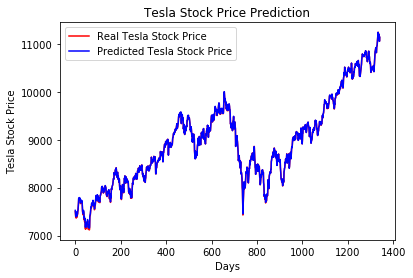

In [21]:
# Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

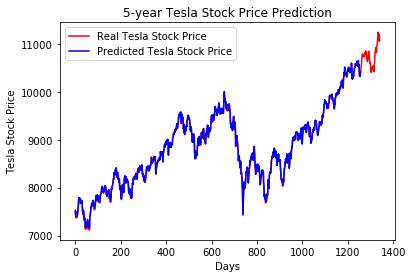

In [23]:
# Getting the real stock price of 2012 - 2016
real_stock_price_train = pd.read_csv('TSE(original).csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('5-year Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

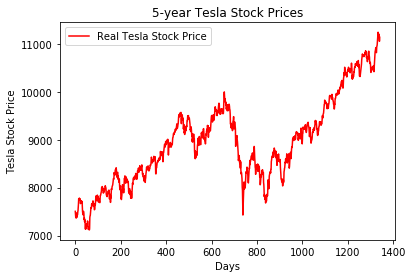

In [24]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real Tesla Stock Price')
plt.title('5-year Tesla Stock Prices')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

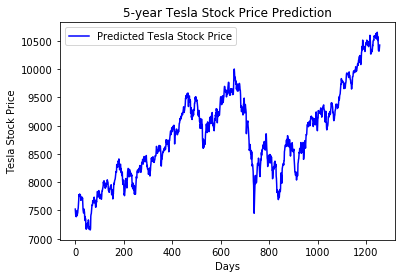

In [25]:
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('5-year Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()